In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data and drop unnecessary columns

In [2]:
df = pd.read_csv("ai4i2020.csv")
df.drop(columns=["UDI","Product ID"], inplace=True)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


## check for missing values

In [3]:
df.isna().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

## check duplicates

In [4]:
df.duplicated().sum()

0

## EDA

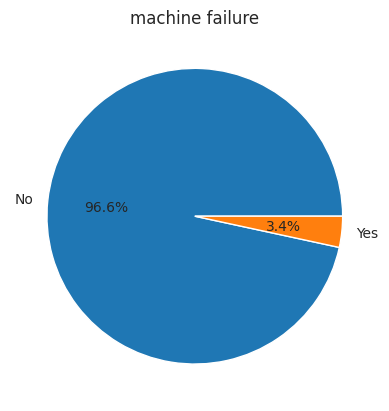

In [22]:
counts = df["Machine failure"].value_counts()
plt.pie(counts, labels=["No", "Yes"], autopct="%1.1f%%")
plt.title("machine failure")
plt.show()

## Machine Type

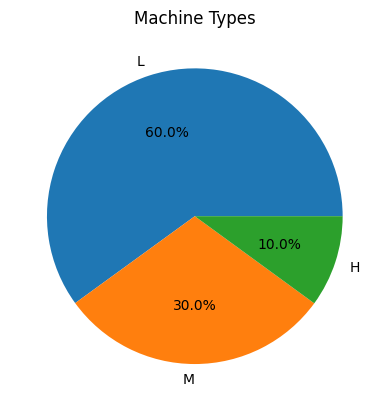

In [6]:
type_count = df["Type"].value_counts()
plt.pie(type_count, labels=type_count.index, autopct="%1.1f%%")  # type: ignore
plt.title("Machine Types")
plt.show()

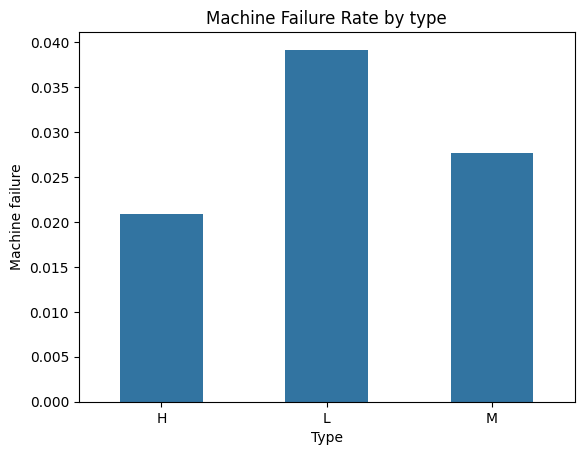

In [7]:
type_failure_rate_df = df.groupby("Type")["Machine failure"].mean().reset_index()
barplot = sns.barplot(
    data=type_failure_rate_df, x="Type", y="Machine failure", width=0.5
)
plt.title("Machine Failure Rate by type")
plt.show()

## Air Temperature

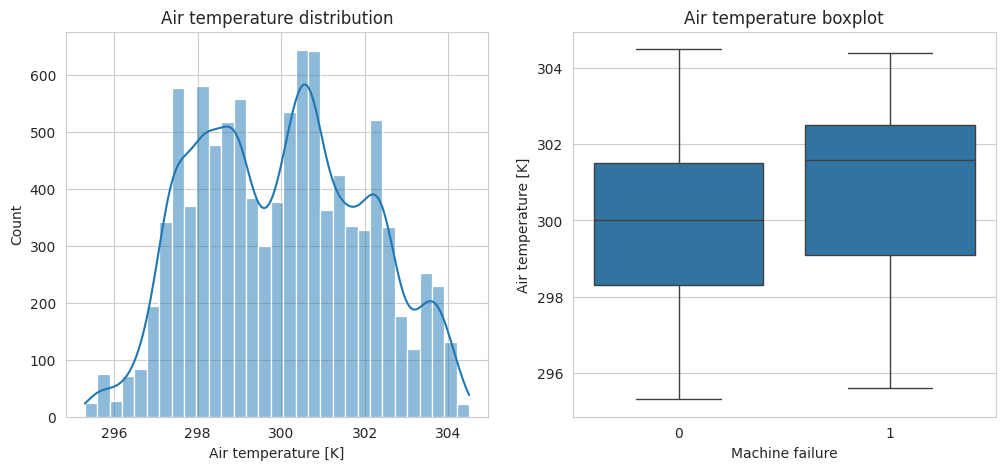

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="Air temperature [K]", kde=True)
plt.title("Air temperature distribution")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Machine failure", y="Air temperature [K]")
plt.title("Air temperature boxplot")
plt.show()

## Process Temperature

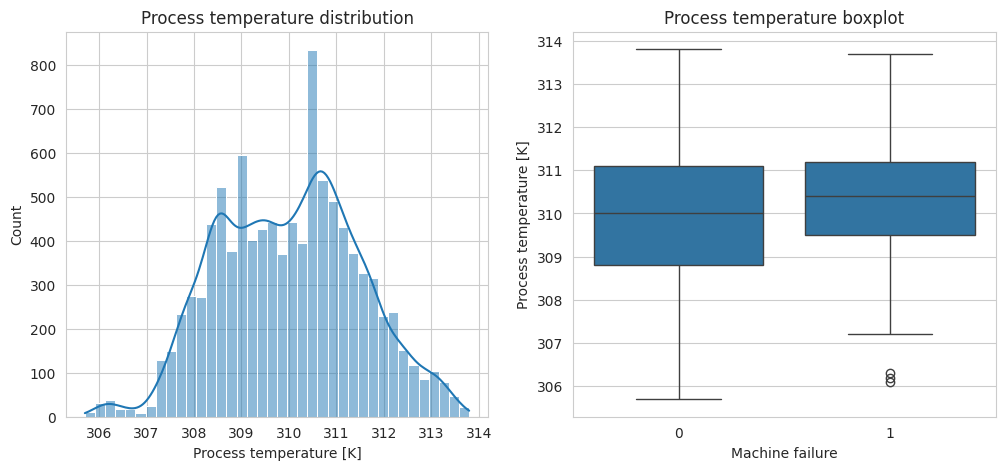

In [9]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="Process temperature [K]", kde=True)
plt.title("Process temperature distribution")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Machine failure", y="Process temperature [K]")
plt.title("Process temperature boxplot")
plt.show()

## Rotational speed

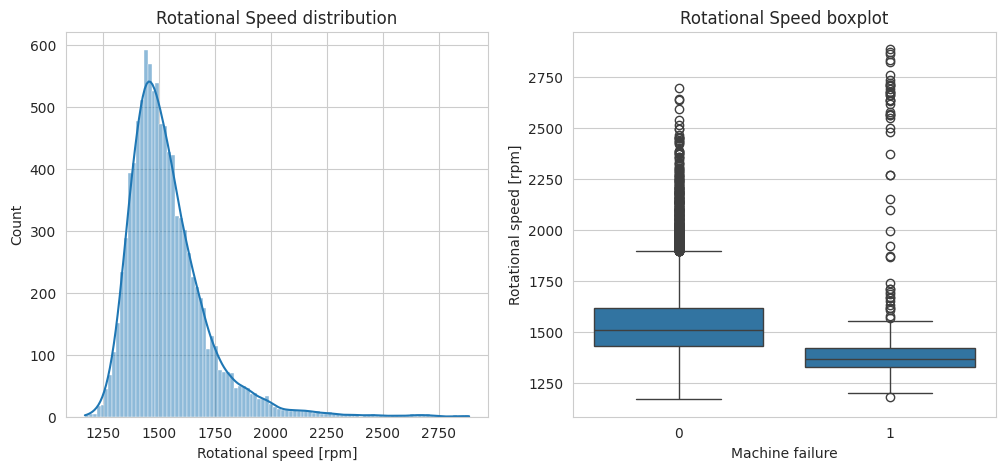

In [10]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="Rotational speed [rpm]", kde=True)
plt.title("Rotational Speed distribution")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Machine failure", y="Rotational speed [rpm]")
plt.title("Rotational Speed boxplot")
plt.show()

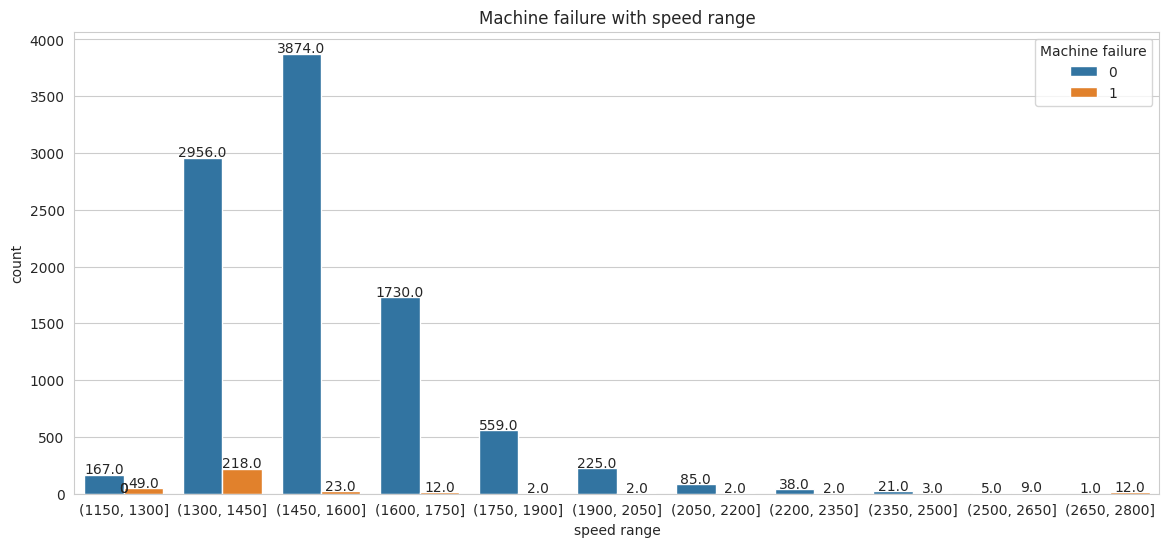

In [11]:
plt.figure(figsize=(14, 6))
df["speed range"] = pd.cut(df["Rotational speed [rpm]"], list(range(1150, 2950, 150)))
ax = sns.countplot(data=df, x="speed range", hue="Machine failure")
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        f"{height}", (bar.get_x() + bar.get_width() / 2, height + 10), ha="center"
    )

plt.title("Machine failure with speed range")
plt.show()

## Torque

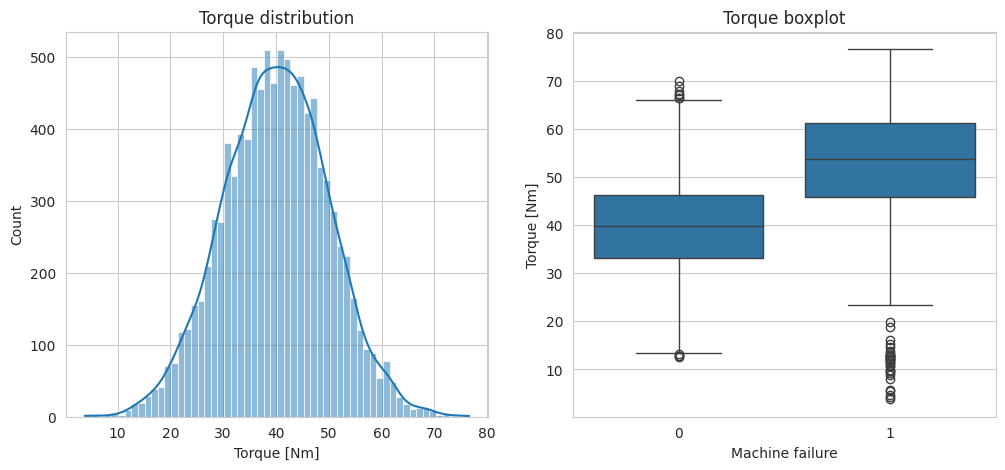

In [12]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="Torque [Nm]", kde=True)
plt.title("Torque distribution")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Machine failure", y="Torque [Nm]")
plt.title("Torque boxplot")
plt.show()

## Tool wear

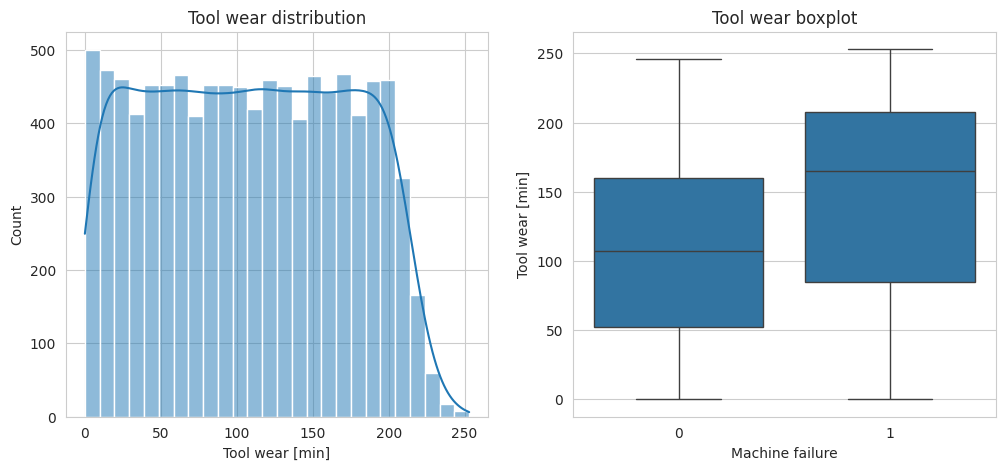

In [13]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="Tool wear [min]", kde=True)
plt.title("Tool wear distribution")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Machine failure", y="Tool wear [min]")
plt.title("Tool wear boxplot")
plt.show()

## Binary column plot

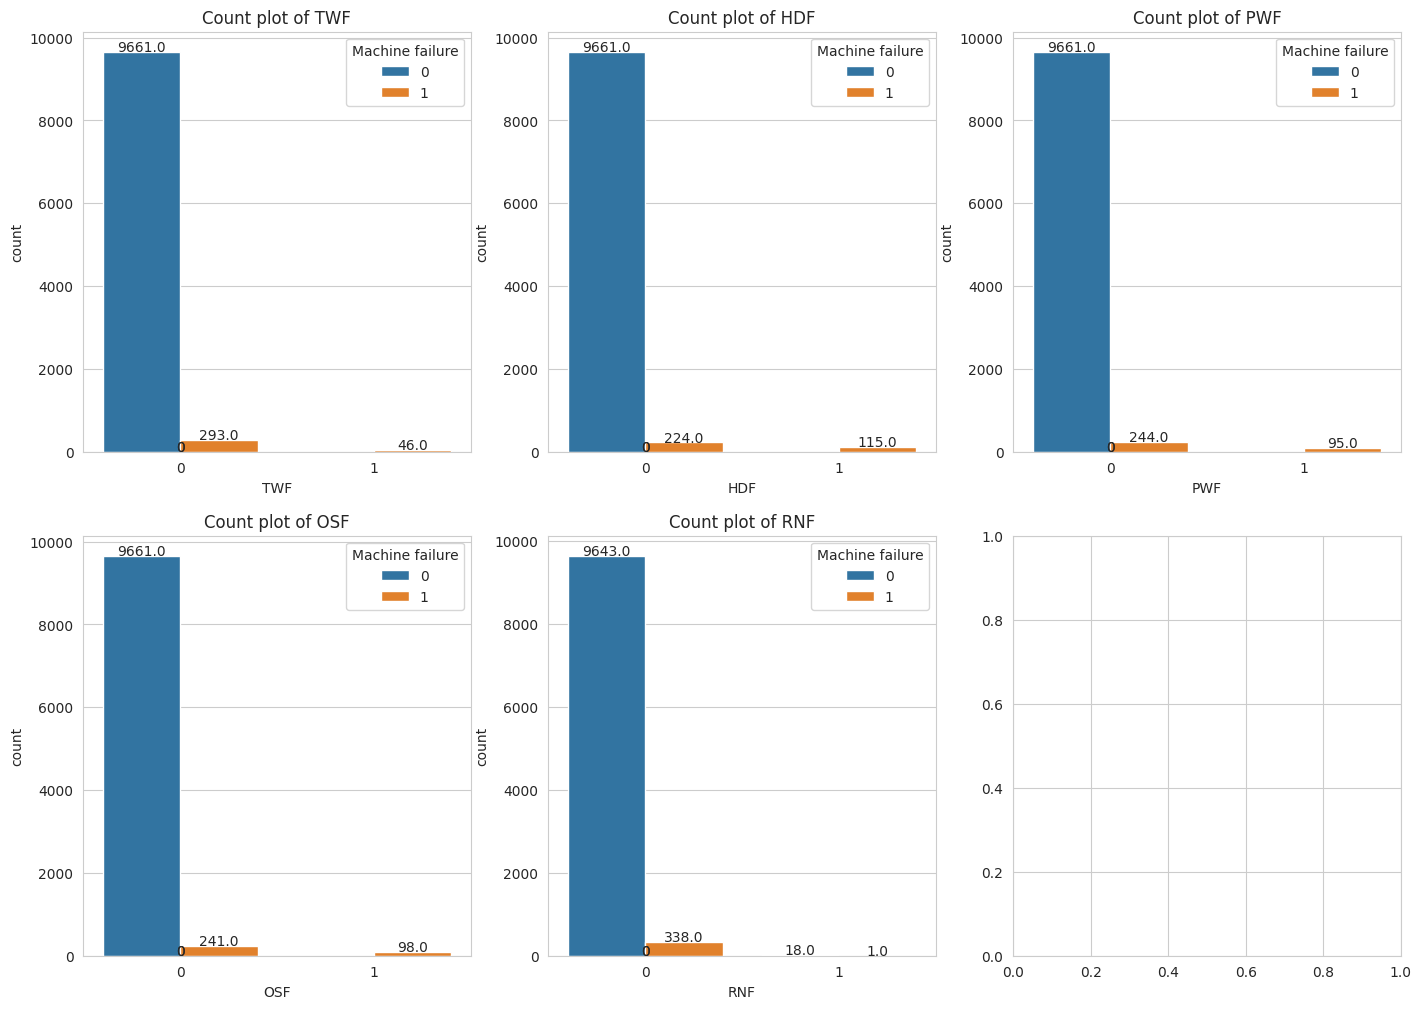

In [14]:
binary_cols = [
    "TWF",
    "HDF",
    "PWF",
    "OSF",
    "RNF",
]  # RNF does not appear to be important for our problem

fig, ax = plt.subplots(2, 3, figsize=(17, 12))
ax = ax.flatten()

for index, col in enumerate(binary_cols):
    sns.countplot(data=df, x=col, hue="Machine failure", ax=ax[index])

    for p in ax[index].patches:
        height = p.get_height()
        ax[index].annotate(
            f"{height}", (p.get_x() + p.get_width() / 2, height + 10), ha="center"
        )

    ax[index].set_title(f"Count plot of {col}")

plt.show()

## Find the correlation between numarical columns

/home/abdelrahman/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


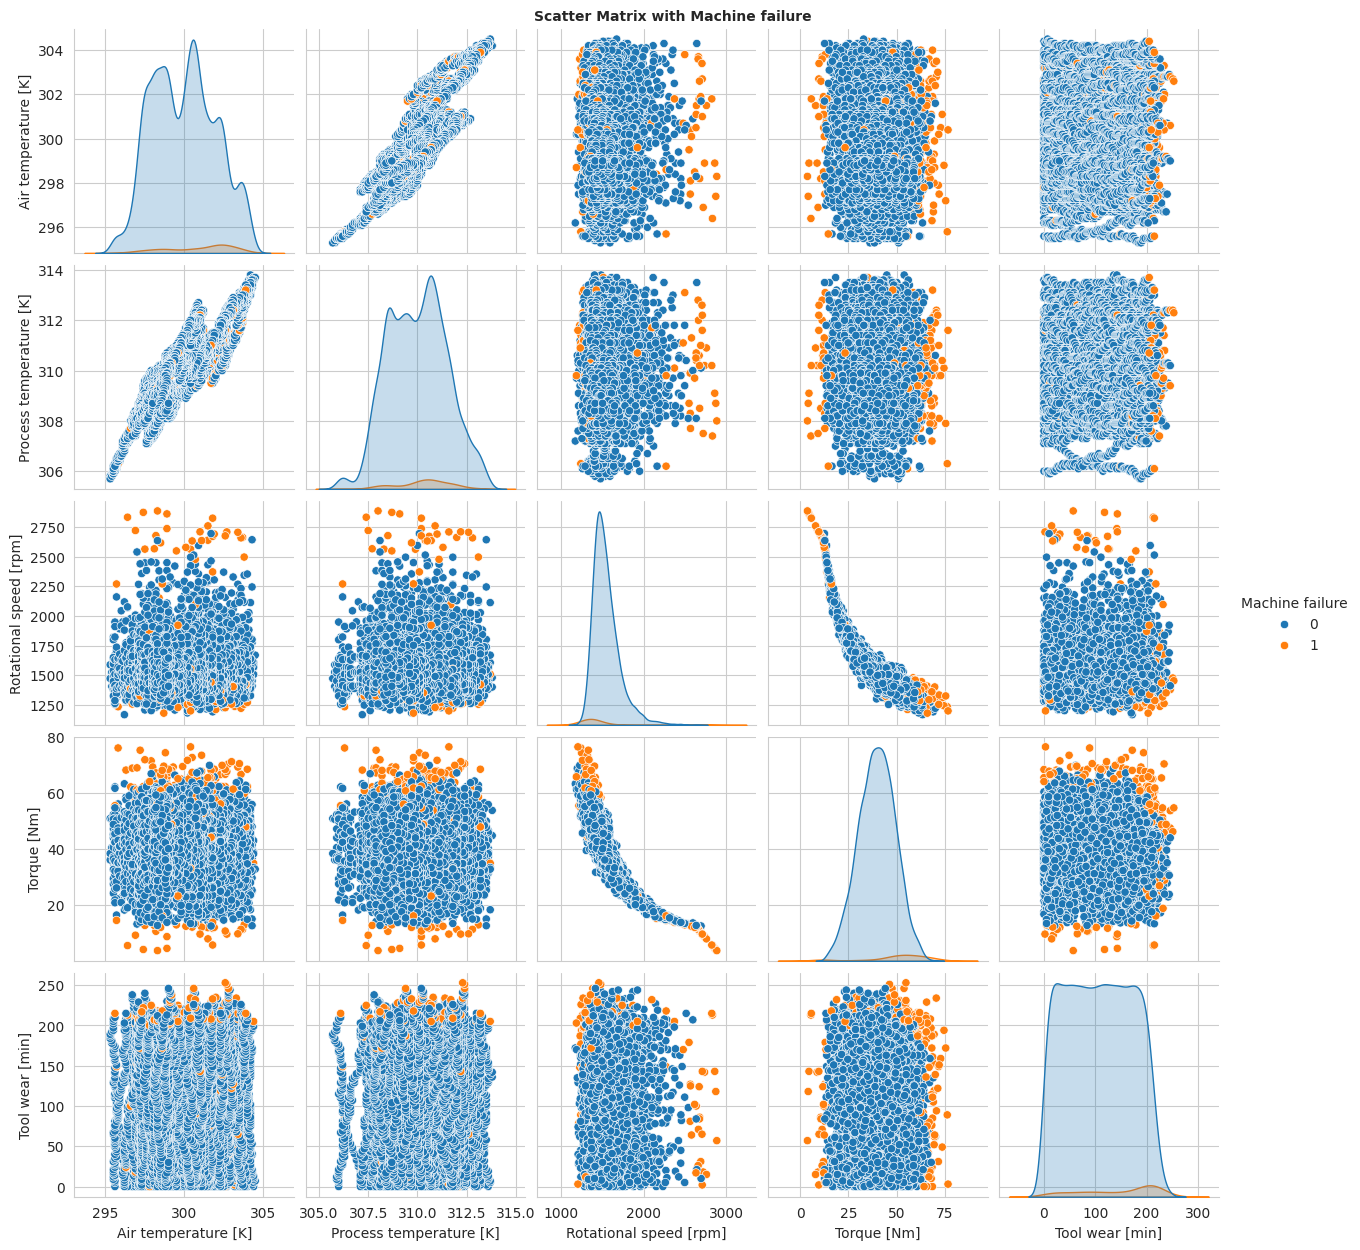

In [24]:
num_cols = [
    "Air temperature [K]",
    "Process temperature [K]",
    "Rotational speed [rpm]",
    "Torque [Nm]",
    "Tool wear [min]",
]

sns.pairplot(data=df,x_vars=num_cols,y_vars=num_cols,hue="Machine failure")
plt.suptitle("Scatter Matrix with Machine failure",ha='center', fontweight='bold', fontsize=10, y=1)
plt.show()

- There is a positive linear relationship between Air Temperature and Process Temperature.
- There is a negative linear relationship between Rotational Speed and Torque.
- The occurrence of Machine Failure is heavily imbalanced.


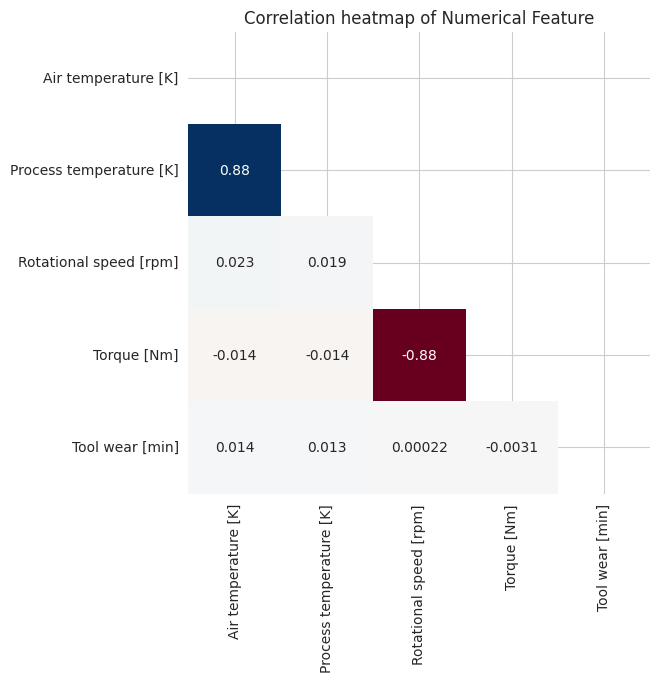

In [16]:
corr_matrix=df[num_cols].corr()
plt.figure(figsize=(8, 6))
mask=np.triu(np.ones_like(corr_matrix,dtype="bool"))
sns.heatmap(data=corr_matrix,annot=True,square=True,cbar=False,cmap="RdBu",mask=mask)

plt.title("Correlation heatmap of Numerical Feature")
plt.show()

In [17]:
filtered_df = df[(df["Machine failure"] == 1) & (df[binary_cols].sum(axis=1) == 0)]

d_columns = binary_cols + ["Machine failure"]
filtered_df = filtered_df[d_columns]

filtered_df

,TWF,HDF,PWF,OSF,RNF,Machine failure
1437,0,0,0,0,0,1
2749,0,0,0,0,0,1
4044,0,0,0,0,0,1
4684,0,0,0,0,0,1
5536,0,0,0,0,0,1
5941,0,0,0,0,0,1
6478,0,0,0,0,0,1
8506,0,0,0,0,0,1
9015,0,0,0,0,0,1


- It is important to note that there are instances when the machine had failure even if one of the failure modes did not trigger.

- There might be an unknown failure mode at play

In [18]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'speed range'],
      dtype='object')

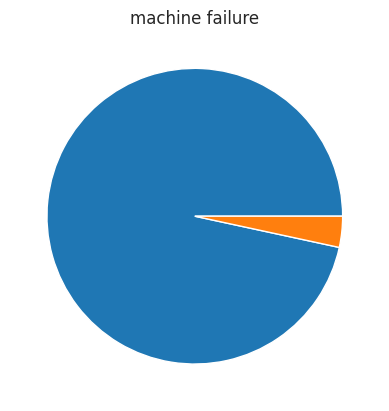

In [20]:
counts2 = df["Machine failure"].value_counts()
plt.pie(counts2)
plt.title("machine failure")
plt.show()

In [21]:
counts2

Machine failure
0    9661
1     339
Name: count, dtype: int64